# **Our work on Twitter Dataset**

# ***Importing Dependencies***


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

> **Importing the dataset**

> **link of the dataset** <https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data>

In [2]:
dataset = pd.read_csv('/content/train.csv', encoding='latin1')

In [3]:
dataset = dataset[['text', 'sentiment']]

In [4]:
dataset.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
dataset = dataset[dataset['text'].notna()]
dataset = dataset[dataset['text'].str.strip() != '']
dataset.reset_index(drop=True, inplace=True)

# ***Exploring Dataset***

In [6]:
print(dataset)

                                                    text sentiment
0                    I`d have responded, if I were going   neutral
1          Sooo SAD I will miss you here in San Diego!!!  negative
2                              my boss is bullying me...  negative
3                         what interview! leave me alone  negative
4       Sons of ****, why couldn`t they put them on t...  negative
...                                                  ...       ...
27475   wish we could come see u on Denver  husband l...  negative
27476   I`ve wondered about rake to.  The client has ...  negative
27477   Yay good for both of you. Enjoy the break - y...  positive
27478                         But it was worth it  ****.  positive
27479     All this flirting going on - The ATG smiles...   neutral

[27480 rows x 2 columns]


In [7]:
dataset['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


In [8]:
X = dataset['text']
y = dataset['sentiment']

In [9]:
X = X.str.lower()

In [10]:
X

,text
0,"i`d have responded, if i were going"
1,sooo sad i will miss you here in san diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"sons of ****, why couldn`t they put them on t..."
...,...
27475,wish we could come see u on denver husband l...
27476,i`ve wondered about rake to. the client has ...
27477,yay good for both of you. enjoy the break - y...
27478,but it was worth it ****.


In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# stopwords.words('english')

In [13]:
def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string inputs
        text = ""
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    return " ".join(new_text)

In [14]:
for sen in range(len(X)):
    X[sen] = remove_stopwords(X[sen])

In [15]:
print(X)


0                                 i`d  responded,    going
1                          sooo sad   miss    san diego!!!
2                                     boss  bullying me...
3                                  interview! leave  alone
4        sons  ****,  couldn`t  put    releases  alread...
                               ...                        
27475    wish  could come see u  denver husband lost  j...
27476    i`ve wondered  rake to.  client  made  clear ....
27477    yay good    you. enjoy  break -  probably need...
27478                                         worth  ****.
27479         flirting going  -  atg smiles. yay. ((hugs))
Name: text, Length: 27480, dtype: object


In [16]:
from nltk.stem.porter import PorterStemmer

In [17]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [18]:

for sen in range(len(X)):
    X[sen] = stem_words(X[sen])

In [19]:
import re


In [20]:
for sen in range(len(X)):
    X[sen] = re.findall("[\w']+" , X[sen])

In [21]:
X

,text
0,"[i, d, responded, go]"
1,"[sooo, sad, miss, san, diego]"
2,"[boss, bulli, me]"
3,"[interview, leav, alon]"
4,"[son, couldn, t, put, releas, alreadi, bought]"
...,...
27475,"[wish, could, come, see, u, denver, husband, l..."
27476,"[i, v, wonder, rake, to, client, made, clear, ..."
27477,"[yay, good, you, enjoy, break, probabl, need, ..."
27478,[worth]


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)

In [23]:
X = tokenizer.texts_to_sequences(X)

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=200)

In [25]:
X

array([[   0,    0,    0, ...,    1,  117,    4],
       [   0,    0,    0, ...,   22, 1230, 2129],
       [   0,    0,    0, ..., 1189, 4225,   52],
       ...,
       [   0,    0,    0, ...,  510,  780, 2636],
       [   0,    0,    0, ...,    0,    0,  614],
       [   0,    0,    0, ..., 4104,  161,  895]], dtype=int32)

In [26]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27480 entries, 0 to 27479
Series name: sentiment
Non-Null Count  Dtype 
--------------  ----- 
27480 non-null  object
dtypes: object(1)
memory usage: 214.8+ KB


In [27]:
y_reshaped = y.values.reshape(-1, 1)

In [28]:
print(y_reshaped.shape)

(27480, 1)


In [29]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

num_classes = len(label_encoder.classes_)

y_encoded = to_categorical(y_numerical, num_classes=num_classes)

In [30]:
y_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [33]:

vocab_size = 5000
embedding_vector_length = 128
max_sequence_length = 200
num_classes = 3

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.4)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 175s 304ms/step - accuracy: 0.4432 - loss: 1.0392 - val_accuracy: 0.6611 - val_loss: 0.7908 - learning_rate: 0.0010
Epoch 2/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 201s 303ms/step - accuracy: 0.6714 - loss: 0.7667 - val_accuracy: 0.6896 - val_loss: 0.7374 - learning_rate: 0.0010
Epoch 3/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 201s 301ms/step - accuracy: 0.7240 - loss: 0.6794 - val_accuracy: 0.7043 - val_loss: 0.7138 - learning_rate: 0.0010
Epoch 4/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 205s 306ms/step - accuracy: 0.7472 - loss: 0.6422 - val_accuracy: 0.7053 - val_loss: 0.7207 - learning_rate: 0.0010
Epoch 5/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 201s 304ms/step - accuracy: 0.7667 - loss: 0.5996 - val_accuracy: 0.7087 - val_loss: 0.7214 - learning_rate: 0.0010
Epoch 6/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.7741 - loss: 0.5735
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 305ms/step - accuracy:

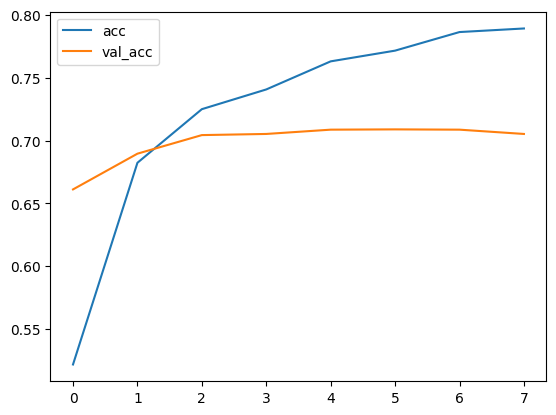

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

In [43]:
test_data = pd.read_csv('/content/test.csv', encoding='latin1')

In [44]:
test_data = test_data[test_data['text'].notna()]
test_data = test_data[test_data['text'].str.strip() != '']
test_data.reset_index(drop=True, inplace=True)

In [45]:
X_test = test_data['text']
y_test = test_data['sentiment']

In [46]:
X_test = X_test.str.lower()

In [47]:
for sen in range(len(X_test)):
    X_test[sen] = remove_stopwords(X_test[sen])

In [48]:

for sen in range(len(X_test)):
    X_test[sen] = stem_words(X_test[sen])

In [49]:
for sen in range(len(X_test)):
    X_test[sen] = re.findall("[\w']+" , X_test[sen])

In [50]:
X_test = tokenizer.texts_to_sequences(X_test)

In [51]:
X_test = pad_sequences(X_test, maxlen=200)

In [52]:
y_test = y_test.values.reshape(-1, 1)

In [53]:
y_numerical = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
y_test = to_categorical(y_numerical, num_classes=num_classes)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7099 - loss: 0.6865


In [55]:
print("Loss : ",loss)
print("Accuracy :",accuracy)

Loss :  0.6821537017822266
Accuracy : 0.7057158946990967
